In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store_numba import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [5]:
sns.color_palette(cccpalette)

[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [6]:
import os
os.listdir()

['.ipynb_checkpoints',
 'calc_csat.py',
 'model_equations_separate_NC_store.py',
 'model_equations_separate_NC_store_numba.py',
 'Model_Parameters Store model.xlsx',
 'model_param_sensitivity_ponly.ipynb',
 'model_store_cc debug.ipynb',
 'model_store_cc.ipynb',
 'model_store_ponly.ipynb',
 'model_store_ponly_find_lsq_x0.ipynb',
 'reference_10cc.xlsx',
 'reference_10cc_axenic.xlsx',
 'reference_pro99_axenic.xlsx',
 'results',
 'results_postprocess.py',
 'run_files',
 'run_least_squares_het.py',
 'run_least_squares_ponly.py',
 'run_monte.py',
 'run_shgo_ponly.py',
 'tmp',
 'VPRO',
 '__pycache__']

In [7]:
refdf = pd.read_excel('reference_pro99_axenic.xlsx',)


In [19]:
    model = 'MIN'
    json_l= []
    which_organism = 'ponly'
    pro99_mode = False
    refdf['ref_Bp'] = refdf['ref_Bp'].clip(lower=4)


    new_param_vals = get_param_vals_from_json_list(model, json_l)
    t_eval, t_end = get_t_eval_and_t_end(None, refdf, 140)
    (var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
        ) = get_constants_per_organism(pro99_mode, which_organism)

    # default - run simulation
    MSE_err, new_param_vals, df, mse_df,= run_solver_from_new_params(
        new_param_vals, refdf, 
         init_var_vals, 
        calc_dydt, prepare_params_tuple, t_end , t_eval, var_names, intermediate_names, return_dfs=True
    )

    print ('MSE:', MSE_err)


MSE: 27198.268937639248


In [10]:
print_params()

Mh  = 1.16e-06, 1.00e-01
Mp  = 1.16e-06, 1.00e-01
gammaDp  = 8.00e-01, 6.91e+04
gammaDh  = 8.00e-01, 6.91e+04
Rp  = 7.00e+00, 6.05e+05
Rh  = 4.50e+00, 3.89e+05
E_leakp  = 1.16e-06, 1.00e-01
E_leakh  = 1.16e-06, 1.00e-01
KONp  = 1.43e-01, 1.23e+04
KINp  = 1.43e-01, 1.23e+04
KOCp  = 1.43e-01, 1.23e+04
KICp  = 1.43e-01, 1.23e+04
KONh  = 2.50e-01, 2.16e+04
KINh  = 2.50e-01, 2.16e+04
KOCh  = 2.50e-01, 2.16e+04
KICh  = 2.50e-01, 2.16e+04
VmaxONp  = 7.65e-06, 6.61e-01
VmaxINp  = 3.82e-05, 3.30e+00
VmaxOCp  = 5.35e-05, 4.62e+00
VmaxICp  = 2.68e-04, 2.31e+01
VmaxONh  = 4.81e-05, 4.16e+00
VmaxINh  = 4.81e-05, 4.16e+00
VmaxOCh  = 2.17e-04, 1.87e+01
VmaxICh  = 0.00e+00, 0.00e+00
OverflowMode  = 1.00e+00, 8.64e+04
E_ROSp  = 6.48e-07, 5.60e-02
E_ROSh  = 4.05e-07, 3.50e-02
VmaxROSh  = 7.70e-06, 6.65e-01
K_ROSh  = 2.50e-01, 2.16e+04
ROS_decay  = 1.16e-07, 1.00e-02
KABp  = 1.43e-01, 1.23e+04
KABh  = 1.43e-01, 1.23e+04
EABp  = 6.48e-17, 5.60e-12
EABh  = 4.05e-17, 3.50e-12
decayABh  = 1.16e-07, 1.00e-02


In [13]:
par_tuple = prepare_params_tuple(new_param_vals)
print_dydt0(calc_dydt, var_names, init_var_vals, par_tuple)


dBp/dt = -4.13e-06, init Bp = 1.79e+00, newval = 1.79e+00
dNp/dt = 2.92e-05, init Np = 0.00e+00, newval = 2.92e-05
dCp/dt = 1.40e-04, init Cp = 0.00e+00, newval = 1.40e-04
dDON/dt = 5.31e-07, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 5.91e-08, init RDON = 0.00e+00, newval = 5.91e-08
dDIN/dt = -2.92e-05, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = 3.72e-06, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 4.13e-07, init RDOC = 0.00e+00, newval = 4.13e-07
dDIC/dt = -1.40e-04, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = 0.00e+00, init ROS = 2.00e-01, newval = 2.00e-01


In [14]:
print_intermediate0(intermediate_func, interm_names, init_var_vals)


NameError: name 'intermediate_func' is not defined

In [16]:
biomass_diff0_ponly(calc_dydt, var_names,init_var_vals, par_tuple)


TypeError: biomass_diff0_ponly() takes 3 positional arguments but 4 were given

In [21]:
mdf = df.melt(id_vars=['t', 'day'])

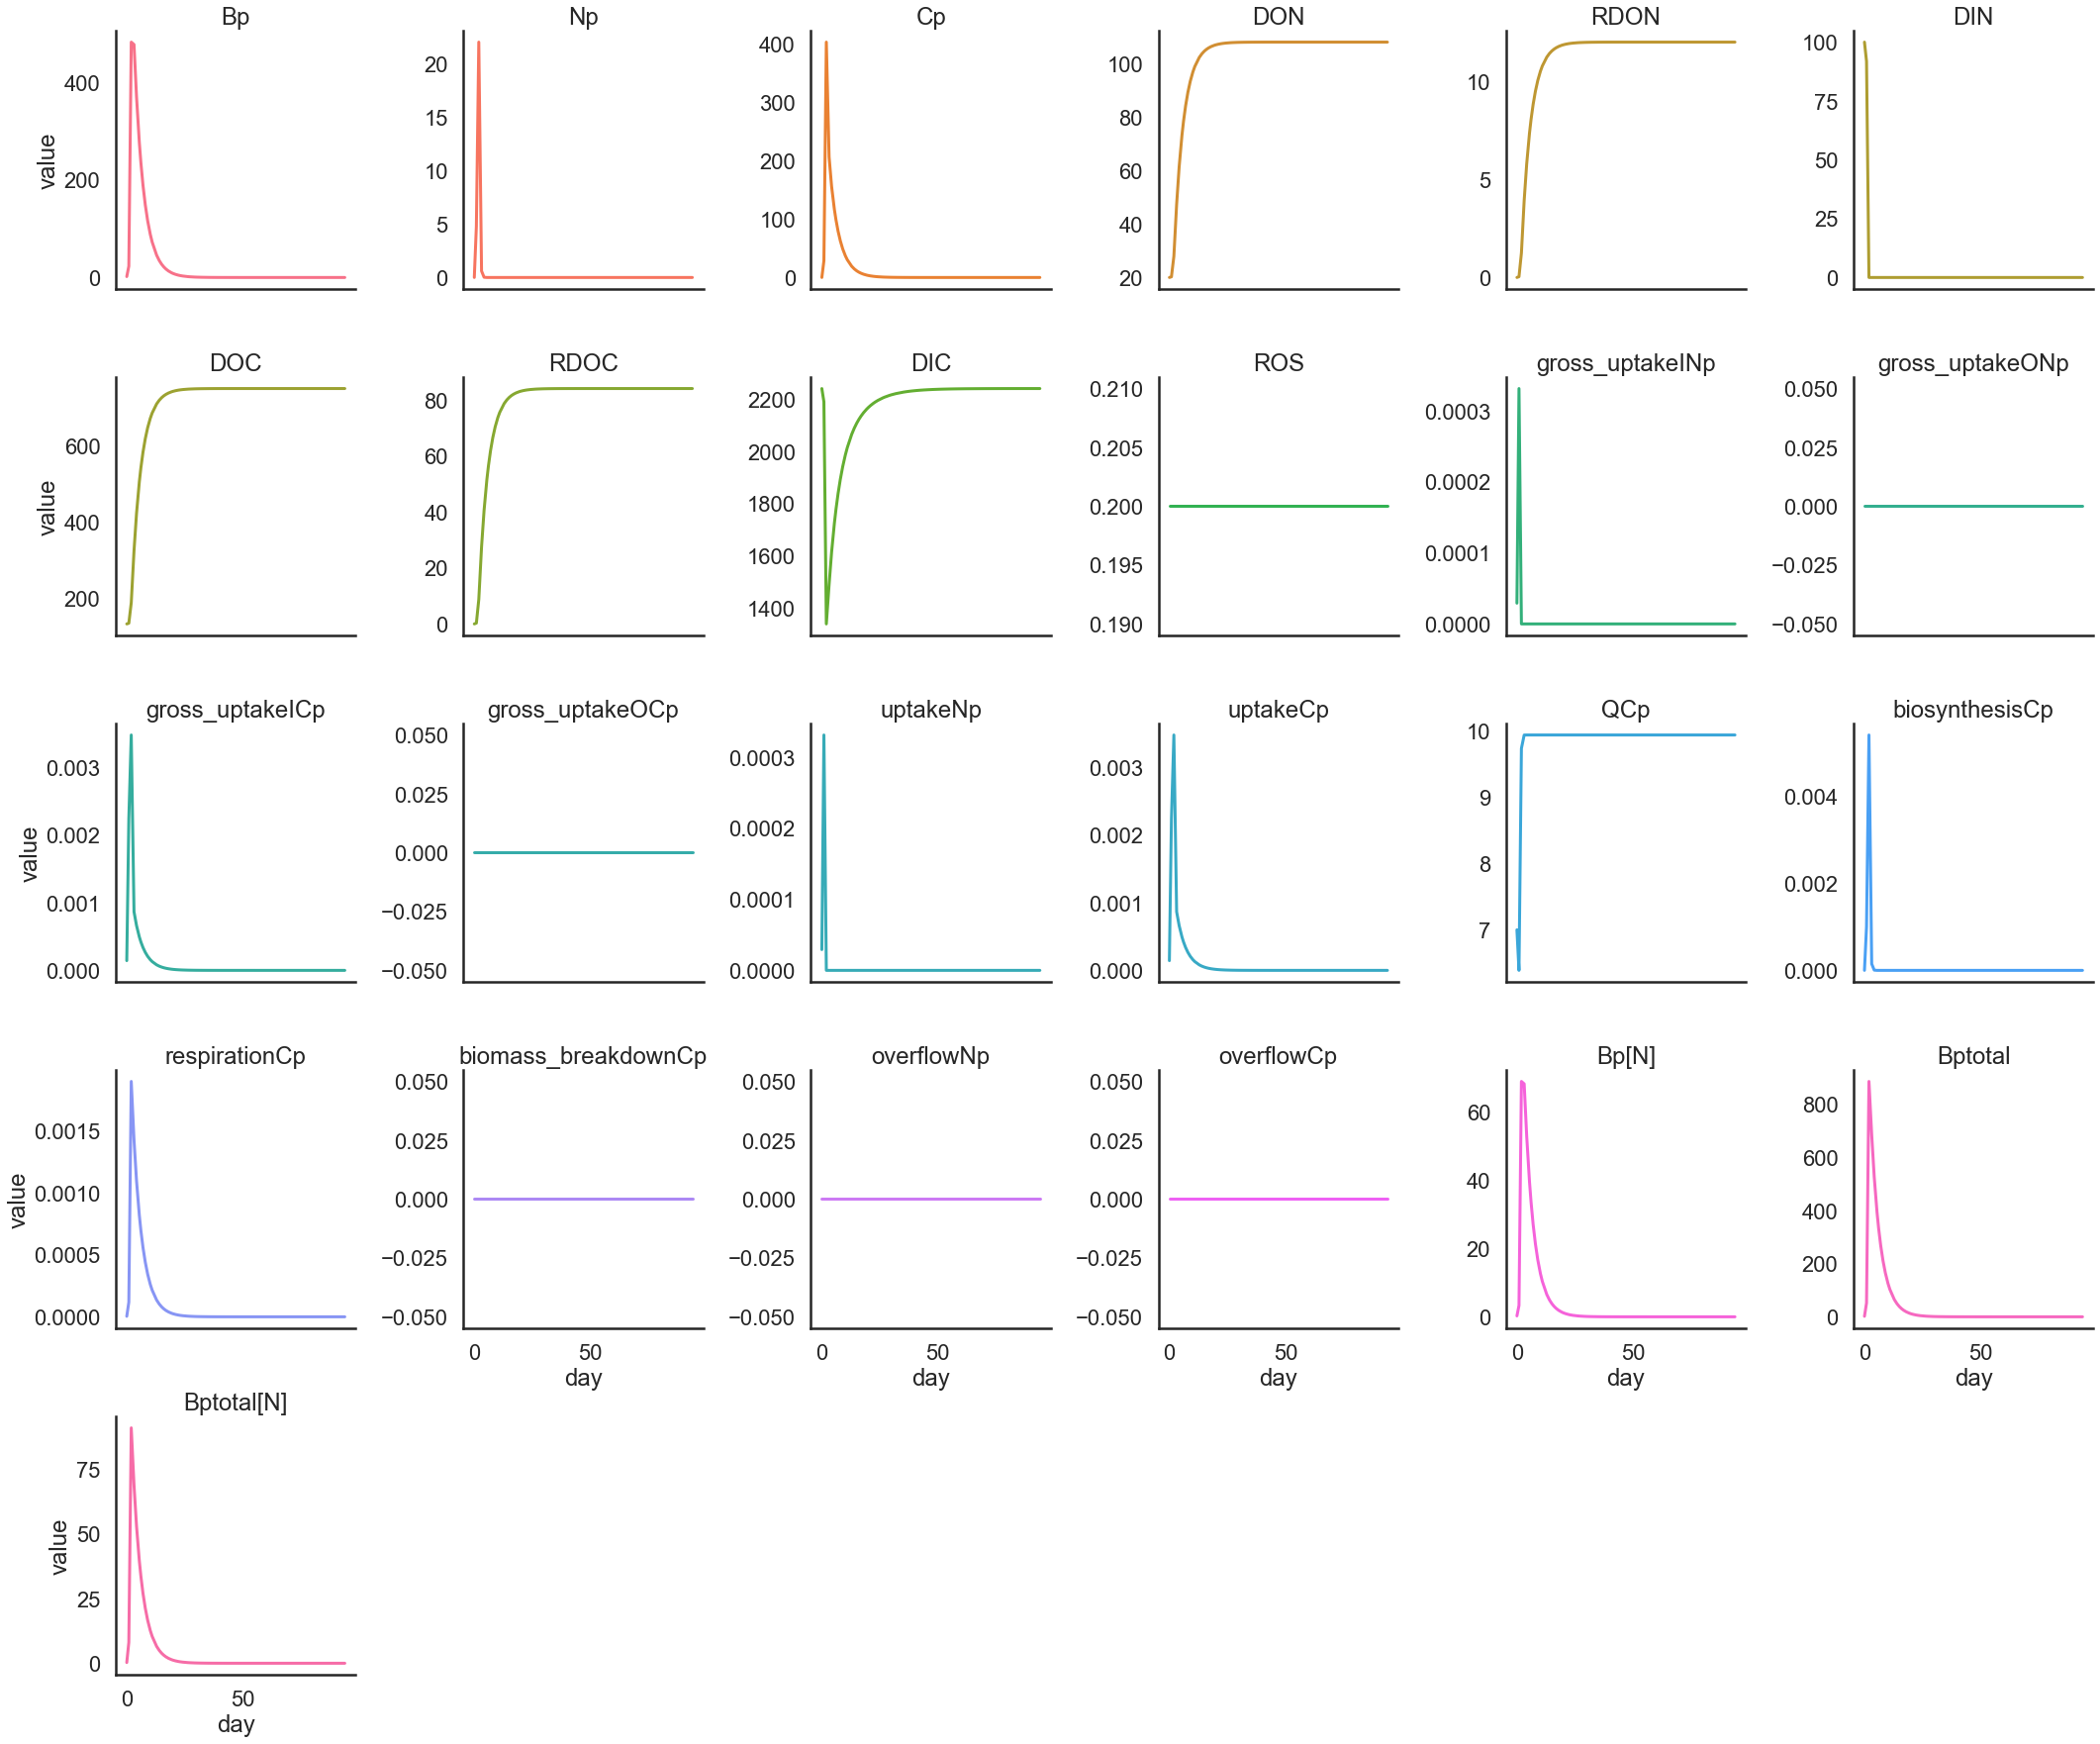

In [22]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [82]:
compute_mse(df,refdf)

,Sample,full name,Group,compare_points,MSE
0,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,15458.426297
1,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,14966.475936
2,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,14417.868836


In [83]:
refdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'predicted', 'ref_Bp',
       'full name', 't'],
      dtype='object')

In [84]:
df.min()

Bp                                     1.690692e+00
Np                                     0.000000e+00
Cp                                     0.000000e+00
DON                                    1.600000e+01
RDON                                   0.000000e+00
DIN                                    1.296061e-02
DOC                                    1.325000e+02
RDOC                                   0.000000e+00
DIC                                    4.120310e-01
ROS                                    4.940166e-02
ABp                                    0.000000e+00
ABh                                    0.000000e+00
t                                      0.000000e+00
day                                    0.000000e+00
gross_uptakeINp                        6.767573e-06
gross_uptakeONp                        0.000000e+00
gross_uptakeICp                        3.428353e-05
gross_uptakeOCp                        0.000000e+00
uptakeNp                               6.767573e-06
uptakeCp    

In [85]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol N/l')
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol C/l')
#sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')



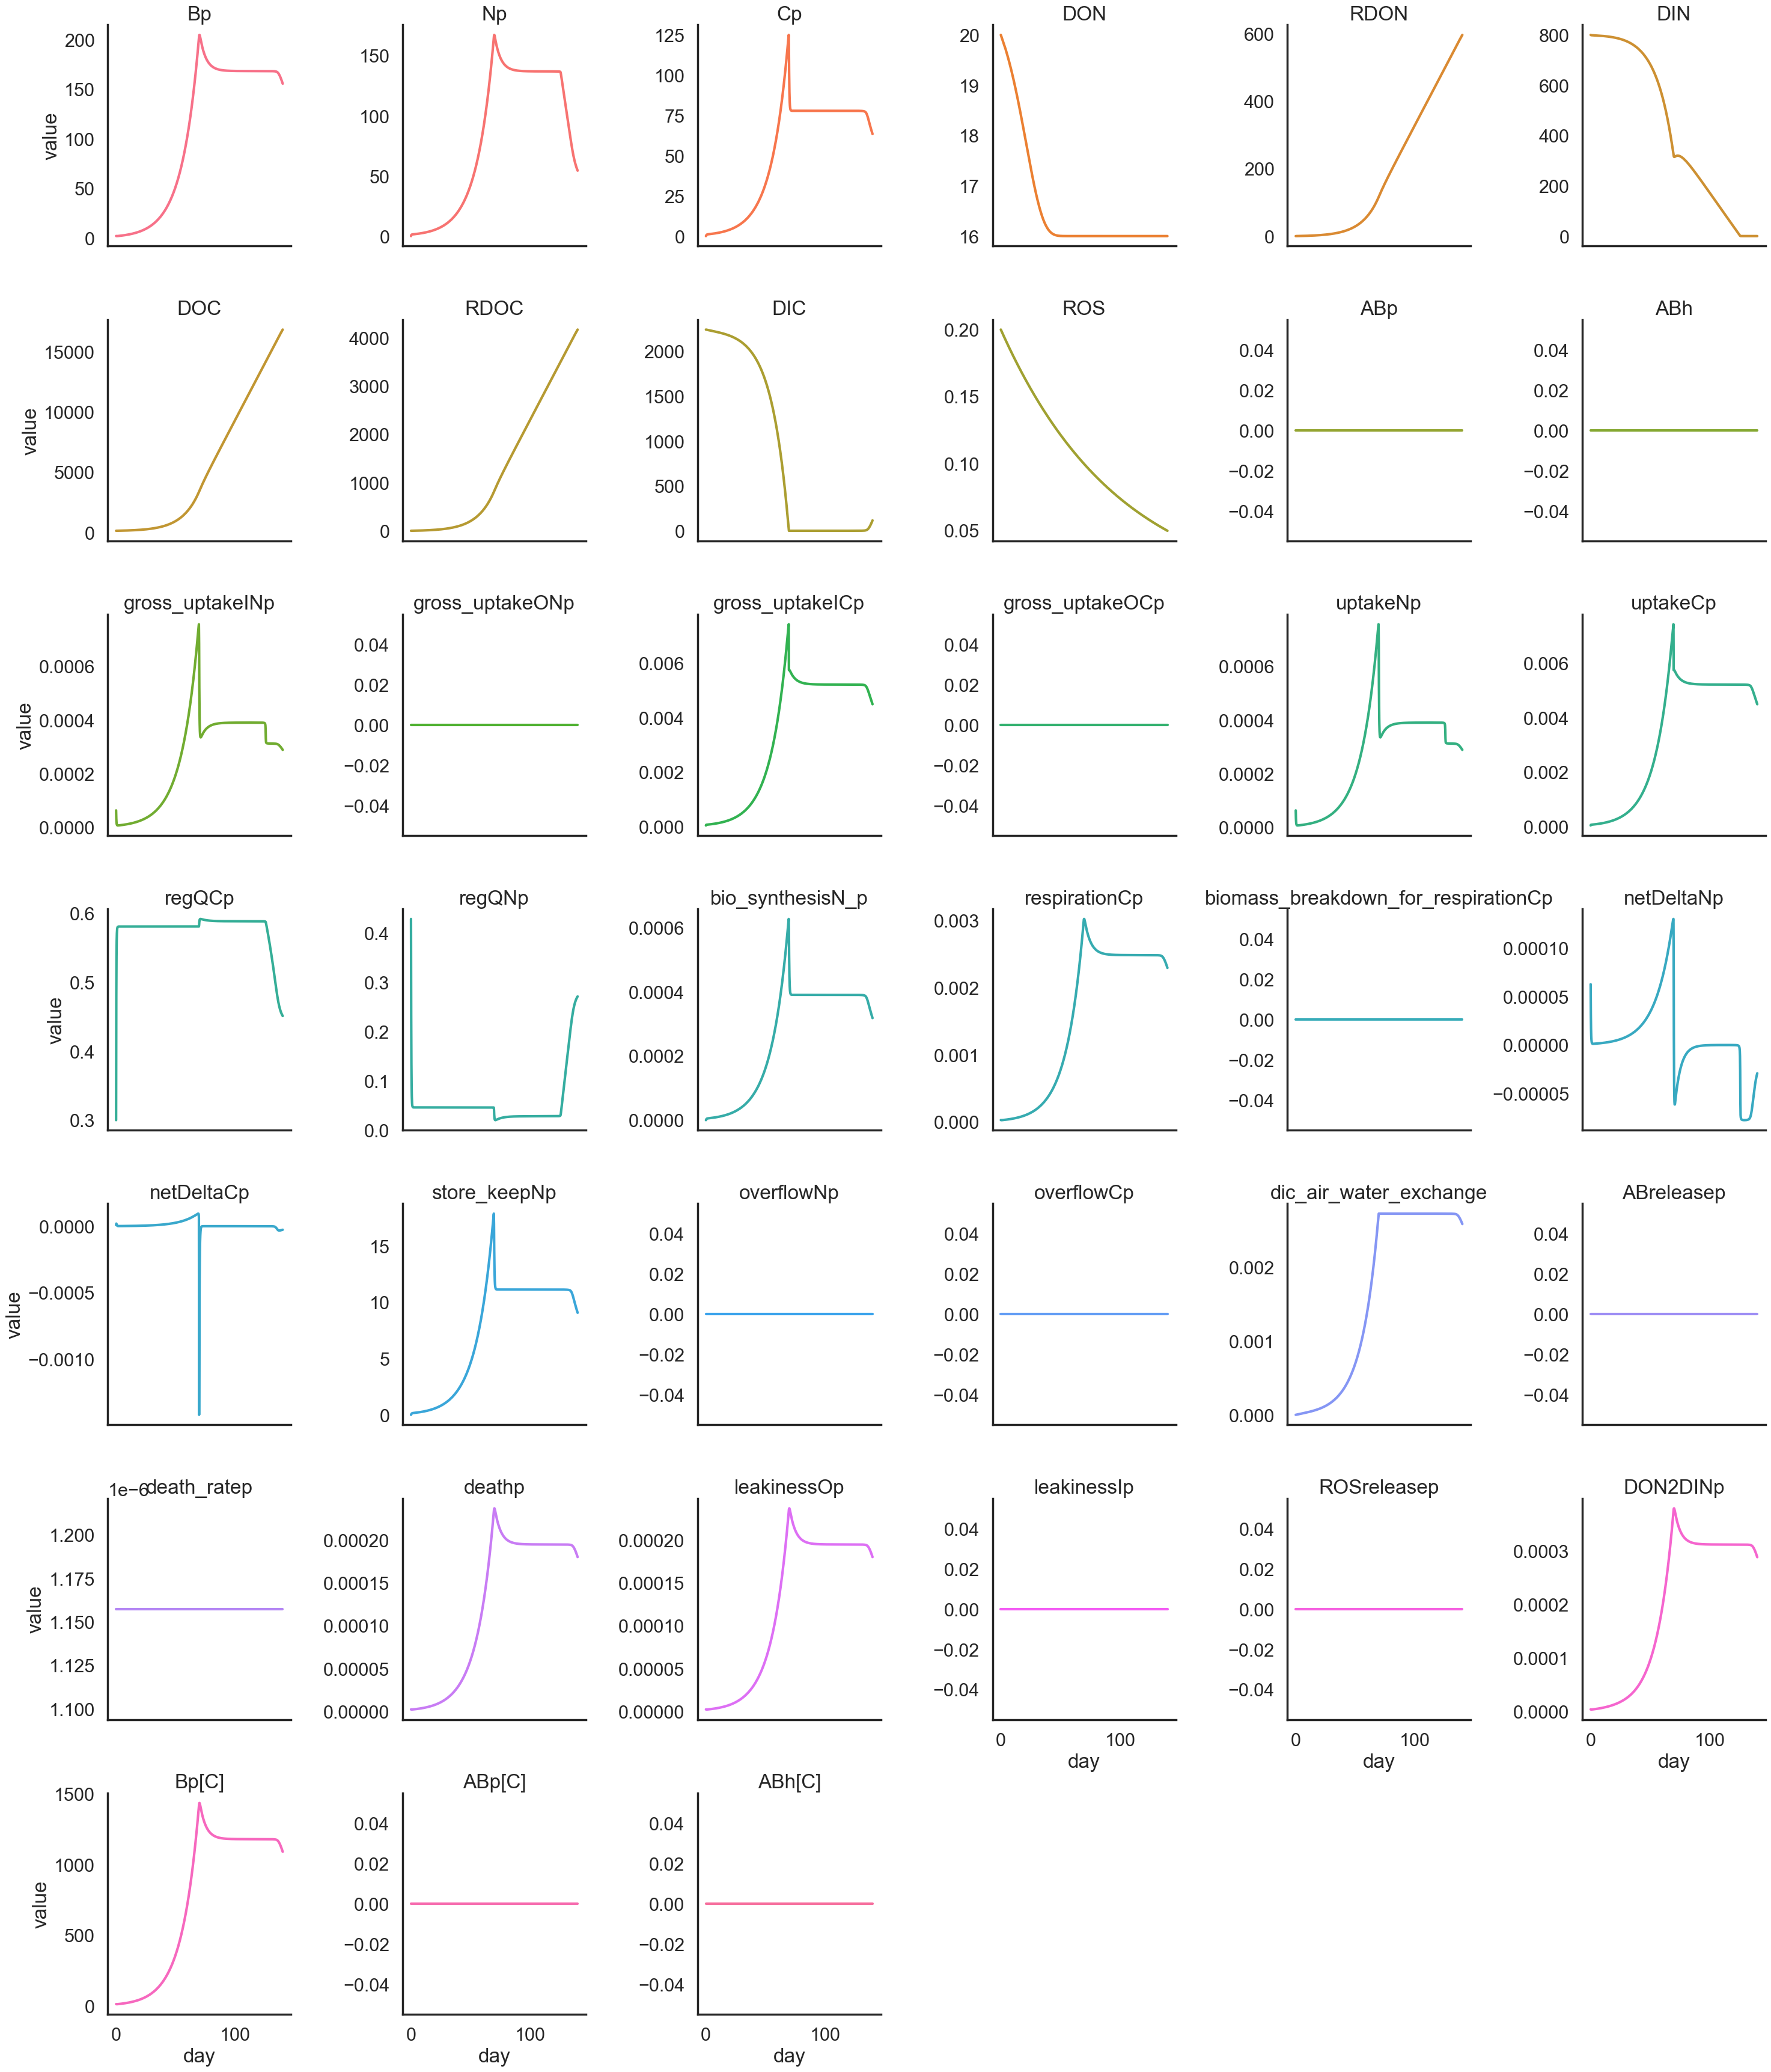

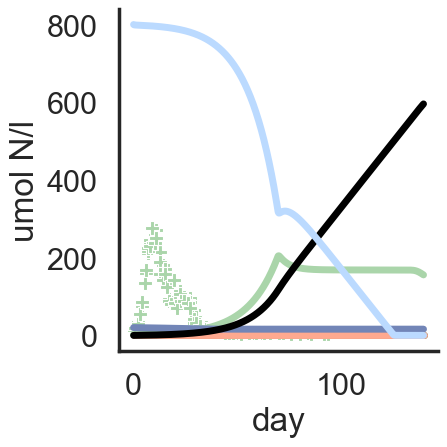

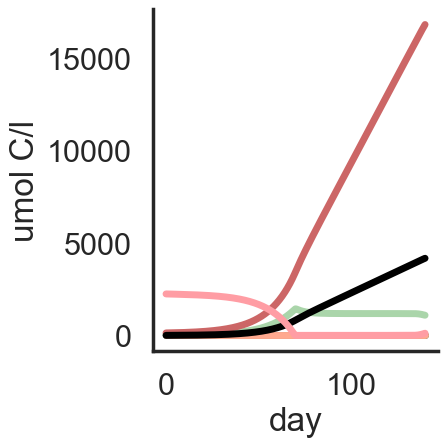

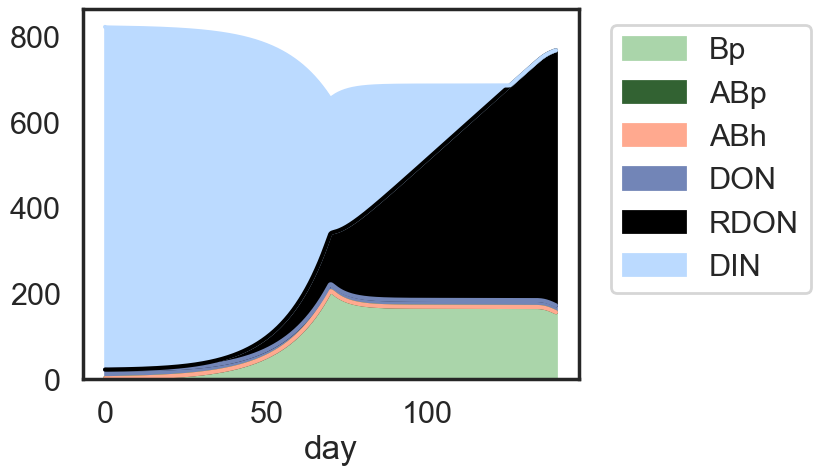

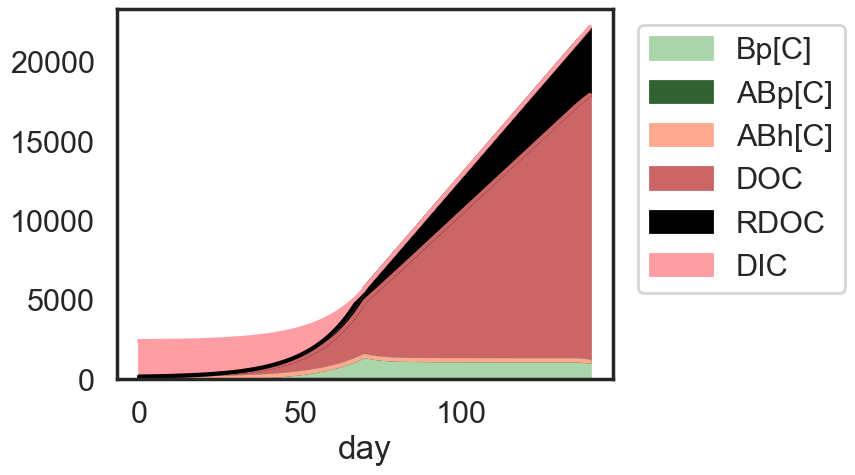

In [86]:
from matplotlib.colors import LinearSegmentedColormap
df.clip(lower=0)[pnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df.clip(lower=0)[pcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()


In [87]:
len(param_vals)

In [88]:
df.min()

Bp                                     1.690692e+00
Np                                     0.000000e+00
Cp                                     0.000000e+00
DON                                    1.600000e+01
RDON                                   0.000000e+00
DIN                                    1.296061e-02
DOC                                    1.325000e+02
RDOC                                   0.000000e+00
DIC                                    4.120310e-01
ROS                                    4.940166e-02
ABp                                    0.000000e+00
ABh                                    0.000000e+00
t                                      0.000000e+00
day                                    0.000000e+00
gross_uptakeINp                        6.767573e-06
gross_uptakeONp                        0.000000e+00
gross_uptakeICp                        3.428353e-05
gross_uptakeOCp                        0.000000e+00
uptakeNp                               6.767573e-06
uptakeCp    